In [39]:
import numpy 
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
numpy.random.seed(10)

In [40]:
dataset = pd.read_csv('D:\\metro\\metroday.csv', header=0, index_col=0)
values = dataset.values

In [41]:
dataset=values[:,0].reshape(-1,1)#注意將一維陣列，轉化為2維陣列
dataset = dataset.astype('float32')
dataset.shape

(2068, 1)

In [42]:
def create_dataset(dataset, look_back=7):#後一個數據和前look_back個數據有關係
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a) #.apeend方法追加元素
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [43]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))#歸一化0-1
dataset = scaler.fit_transform(dataset)
# split into train and test sets  #訓練集和測試集分割
train, test = dataset[:1600,:], dataset[1600:,:]#訓練集和測試集
# use this function to prepare the train and test datasets for modeling
look_back = 7
trainX,trainY = create_dataset(train, look_back)#訓練輸入輸出
testX,testY=create_dataset(test, look_back)#測試輸入輸出

In [44]:
 #reshape input to be [samples, time steps, features]#注意轉化資料維數
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

(1592, 1, 7) (1592,) (460, 1, 7) (460,)


In [45]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM

In [46]:
model = Sequential()
model.add(LSTM(units = 128, return_sequences = True, input_shape = (1, look_back)))
model.add(LSTM(units = 64, return_sequences = True))
model.add(LSTM(units = 32, return_sequences = True))
model.add(LSTM(units = 16))
model.add(Dense(units=1,activation='relu' ))
model.add(Dense(units=1,activation='sigmoid' ))

In [47]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 1, 128)            69632     
_________________________________________________________________
lstm_10 (LSTM)               (None, 1, 64)             49408     
_________________________________________________________________
lstm_11 (LSTM)               (None, 1, 32)             12416     
_________________________________________________________________
lstm_12 (LSTM)               (None, 16)                3136      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 2         
Total params: 134,611
Trainable params: 134,611
Non-trainable params: 0
________________________________________________

In [48]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [49]:
history = model.fit(trainX, trainY, epochs = 7000, batch_size = 50,verbose=1)

Epoch 1/7000
1592/1592 [==============================] - 2s 1ms/step - loss: 0.0197
Epoch 2/7000
1592/1592 [==============================] - 0s 127us/step - loss: 0.0080
Epoch 3/7000
1592/1592 [==============================] - 0s 120us/step - loss: 0.0076
Epoch 4/7000
1592/1592 [==============================] - 0s 125us/step - loss: 0.0075
Epoch 5/7000
1592/1592 [==============================] - 0s 117us/step - loss: 0.0075
Epoch 6/7000
1592/1592 [==============================] - 0s 117us/step - loss: 0.0073
Epoch 7/7000
1592/1592 [==============================] - 0s 122us/step - loss: 0.0071
Epoch 8/7000
1592/1592 [==============================] - 0s 124us/step - loss: 0.0068
Epoch 9/7000
1592/1592 [==============================] - 0s 128us/step - loss: 0.0063
Epoch 10/7000
1592/1592 [==============================] - 0s 125us/step - loss: 0.0061
Epoch 11/7000
1592/1592 [==============================] - 0s 120us/step - loss: 0.0057
Epoch 12/7000
1592/1592 [==================

1592/1592 [==============================] - 0s 145us/step - loss: 0.0051
Epoch 95/7000
1592/1592 [==============================] - 0s 133us/step - loss: 0.0050
Epoch 96/7000
1592/1592 [==============================] - 0s 130us/step - loss: 0.0049
Epoch 97/7000
1592/1592 [==============================] - 0s 133us/step - loss: 0.0050
Epoch 98/7000
1592/1592 [==============================] - 0s 130us/step - loss: 0.0050
Epoch 99/7000
1592/1592 [==============================] - 0s 133us/step - loss: 0.0050
Epoch 100/7000
1592/1592 [==============================] - 0s 137us/step - loss: 0.0050
Epoch 101/7000
1592/1592 [==============================] - 0s 130us/step - loss: 0.0049
Epoch 102/7000
1592/1592 [==============================] - 0s 130us/step - loss: 0.0050
Epoch 103/7000
1592/1592 [==============================] - 0s 136us/step - loss: 0.0050
Epoch 104/7000
1592/1592 [==============================] - 0s 134us/step - loss: 0.0051
Epoch 105/7000
1592/1592 [===============

1592/1592 [==============================] - 0s 128us/step - loss: 0.0046
Epoch 187/7000
1592/1592 [==============================] - 0s 108us/step - loss: 0.0046
Epoch 188/7000
1592/1592 [==============================] - 0s 137us/step - loss: 0.0045
Epoch 189/7000
1592/1592 [==============================] - 0s 147us/step - loss: 0.0045
Epoch 190/7000
1592/1592 [==============================] - 0s 128us/step - loss: 0.0046
Epoch 191/7000
1592/1592 [==============================] - 0s 157us/step - loss: 0.0045
Epoch 192/7000
1592/1592 [==============================] - 0s 123us/step - loss: 0.0045
Epoch 193/7000
1592/1592 [==============================] - 0s 155us/step - loss: 0.0046
Epoch 194/7000
1592/1592 [==============================] - 0s 114us/step - loss: 0.0047
Epoch 195/7000
1592/1592 [==============================] - 0s 165us/step - loss: 0.0046
Epoch 196/7000
1592/1592 [==============================] - 0s 110us/step - loss: 0.0045
Epoch 197/7000
1592/1592 [==========

1592/1592 [==============================] - 0s 118us/step - loss: 0.0043
Epoch 279/7000
1592/1592 [==============================] - 0s 128us/step - loss: 0.0044
Epoch 280/7000
1592/1592 [==============================] - 0s 133us/step - loss: 0.0043
Epoch 281/7000
1592/1592 [==============================] - 0s 142us/step - loss: 0.0042
Epoch 282/7000
1592/1592 [==============================] - 0s 149us/step - loss: 0.0043
Epoch 283/7000
1592/1592 [==============================] - 0s 137us/step - loss: 0.0044
Epoch 284/7000
1592/1592 [==============================] - 0s 149us/step - loss: 0.0043
Epoch 285/7000
1592/1592 [==============================] - 0s 128us/step - loss: 0.0044
Epoch 286/7000
1592/1592 [==============================] - 0s 138us/step - loss: 0.0045
Epoch 287/7000
1592/1592 [==============================] - 0s 126us/step - loss: 0.0044
Epoch 288/7000
1592/1592 [==============================] - 0s 118us/step - loss: 0.0043
Epoch 289/7000
1592/1592 [==========

1592/1592 [==============================] - 0s 129us/step - loss: 0.0039
Epoch 371/7000
1592/1592 [==============================] - 0s 124us/step - loss: 0.0039
Epoch 372/7000
1592/1592 [==============================] - 0s 128us/step - loss: 0.0038
Epoch 373/7000
1592/1592 [==============================] - 0s 137us/step - loss: 0.0038
Epoch 374/7000
1592/1592 [==============================] - 0s 128us/step - loss: 0.0038
Epoch 375/7000
1592/1592 [==============================] - 0s 122us/step - loss: 0.0039
Epoch 376/7000
1592/1592 [==============================] - 0s 128us/step - loss: 0.0039
Epoch 377/7000
1592/1592 [==============================] - 0s 118us/step - loss: 0.0038
Epoch 378/7000
1592/1592 [==============================] - 0s 118us/step - loss: 0.0039
Epoch 379/7000
1592/1592 [==============================] - 0s 147us/step - loss: 0.0040
Epoch 380/7000
1592/1592 [==============================] - 0s 126us/step - loss: 0.0037
Epoch 381/7000
1592/1592 [==========

1592/1592 [==============================] - 0s 118us/step - loss: 0.0032
Epoch 463/7000
1592/1592 [==============================] - 0s 118us/step - loss: 0.0033
Epoch 464/7000
1592/1592 [==============================] - 0s 138us/step - loss: 0.0031
Epoch 465/7000
1592/1592 [==============================] - 0s 113us/step - loss: 0.0032
Epoch 466/7000
1592/1592 [==============================] - 0s 118us/step - loss: 0.0033
Epoch 467/7000
1592/1592 [==============================] - 0s 118us/step - loss: 0.0031
Epoch 468/7000
1592/1592 [==============================] - 0s 137us/step - loss: 0.0033
Epoch 469/7000
1592/1592 [==============================] - 0s 127us/step - loss: 0.0033
Epoch 470/7000
1592/1592 [==============================] - 0s 115us/step - loss: 0.0031
Epoch 471/7000
1592/1592 [==============================] - 0s 128us/step - loss: 0.0031
Epoch 472/7000
1592/1592 [==============================] - 0s 128us/step - loss: 0.0030
Epoch 473/7000
1592/1592 [==========

1592/1592 [==============================] - 0s 98us/step - loss: 0.0027
Epoch 555/7000
1592/1592 [==============================] - 0s 88us/step - loss: 0.0028
Epoch 556/7000
1592/1592 [==============================] - 0s 98us/step - loss: 0.0029
Epoch 557/7000
1592/1592 [==============================] - 0s 103us/step - loss: 0.0029
Epoch 558/7000
1592/1592 [==============================] - 0s 86us/step - loss: 0.0029
Epoch 559/7000
1592/1592 [==============================] - 0s 87us/step - loss: 0.0027
Epoch 560/7000
1592/1592 [==============================] - 0s 84us/step - loss: 0.0027
Epoch 561/7000
1592/1592 [==============================] - 0s 110us/step - loss: 0.0027
Epoch 562/7000
1592/1592 [==============================] - 0s 90us/step - loss: 0.0028
Epoch 563/7000
1592/1592 [==============================] - 0s 88us/step - loss: 0.0028
Epoch 564/7000
1592/1592 [==============================] - 0s 86us/step - loss: 0.0028
Epoch 565/7000
1592/1592 [===================

1592/1592 [==============================] - 0s 96us/step - loss: 0.0024
Epoch 647/7000
1592/1592 [==============================] - 0s 79us/step - loss: 0.0025
Epoch 648/7000
1592/1592 [==============================] - 0s 88us/step - loss: 0.0025
Epoch 649/7000
1592/1592 [==============================] - 0s 88us/step - loss: 0.0025
Epoch 650/7000
1592/1592 [==============================] - 0s 88us/step - loss: 0.0024
Epoch 651/7000
1592/1592 [==============================] - 0s 98us/step - loss: 0.0025
Epoch 652/7000
1592/1592 [==============================] - 0s 88us/step - loss: 0.0025
Epoch 653/7000
1592/1592 [==============================] - 0s 99us/step - loss: 0.0024
Epoch 654/7000
1592/1592 [==============================] - 0s 88us/step - loss: 0.0024
Epoch 655/7000
1592/1592 [==============================] - 0s 98us/step - loss: 0.0025
Epoch 656/7000
1592/1592 [==============================] - 0s 88us/step - loss: 0.0025
Epoch 657/7000
1592/1592 [=====================

1592/1592 [==============================] - 0s 88us/step - loss: 0.0022
Epoch 739/7000
1592/1592 [==============================] - 0s 98us/step - loss: 0.0021
Epoch 740/7000
1592/1592 [==============================] - 0s 88us/step - loss: 0.0022
Epoch 741/7000
1592/1592 [==============================] - 0s 88us/step - loss: 0.0022
Epoch 742/7000
1592/1592 [==============================] - 0s 94us/step - loss: 0.0020
Epoch 743/7000
1592/1592 [==============================] - 0s 98us/step - loss: 0.0021
Epoch 744/7000
1592/1592 [==============================] - 0s 88us/step - loss: 0.0024
Epoch 745/7000
1592/1592 [==============================] - 0s 88us/step - loss: 0.0025
Epoch 746/7000
1592/1592 [==============================] - 0s 78us/step - loss: 0.0023
Epoch 747/7000
1592/1592 [==============================] - 0s 98us/step - loss: 0.0025
Epoch 748/7000
1592/1592 [==============================] - 0s 95us/step - loss: 0.0021
Epoch 749/7000
1592/1592 [=====================

1592/1592 [==============================] - 0s 88us/step - loss: 0.0018
Epoch 832/7000
1592/1592 [==============================] - 0s 88us/step - loss: 0.0020
Epoch 833/7000
1592/1592 [==============================] - 0s 88us/step - loss: 0.0019
Epoch 834/7000
1592/1592 [==============================] - 0s 88us/step - loss: 0.0019
Epoch 835/7000
1592/1592 [==============================] - 0s 88us/step - loss: 0.0019
Epoch 836/7000
1592/1592 [==============================] - 0s 95us/step - loss: 0.0018
Epoch 837/7000
1592/1592 [==============================] - 0s 91us/step - loss: 0.0019
Epoch 838/7000
1592/1592 [==============================] - 0s 98us/step - loss: 0.0019
Epoch 839/7000
1592/1592 [==============================] - 0s 99us/step - loss: 0.0019
Epoch 840/7000
1592/1592 [==============================] - 0s 88us/step - loss: 0.0018
Epoch 841/7000
1592/1592 [==============================] - 0s 78us/step - loss: 0.0019
Epoch 842/7000
1592/1592 [=====================

1592/1592 [==============================] - 0s 98us/step - loss: 0.0016
Epoch 925/7000
1592/1592 [==============================] - 0s 91us/step - loss: 0.0016
Epoch 926/7000
1592/1592 [==============================] - 0s 90us/step - loss: 0.0016
Epoch 927/7000
1592/1592 [==============================] - 0s 98us/step - loss: 0.0016
Epoch 928/7000
1592/1592 [==============================] - 0s 88us/step - loss: 0.0017
Epoch 929/7000
1592/1592 [==============================] - 0s 88us/step - loss: 0.0016
Epoch 930/7000
1592/1592 [==============================] - 0s 88us/step - loss: 0.0016
Epoch 931/7000
1592/1592 [==============================] - 0s 88us/step - loss: 0.0016
Epoch 932/7000
1592/1592 [==============================] - 0s 95us/step - loss: 0.0016
Epoch 933/7000
1592/1592 [==============================] - 0s 88us/step - loss: 0.0016
Epoch 934/7000
1592/1592 [==============================] - 0s 98us/step - loss: 0.0017
Epoch 935/7000
1592/1592 [=====================

Epoch 1017/7000
1592/1592 [==============================] - 0s 88us/step - loss: 0.0015
Epoch 1018/7000
1592/1592 [==============================] - 0s 98us/step - loss: 0.0015
Epoch 1019/7000
1592/1592 [==============================] - 0s 92us/step - loss: 0.0016
Epoch 1020/7000
1592/1592 [==============================] - 0s 88us/step - loss: 0.0016
Epoch 1021/7000
1592/1592 [==============================] - 0s 88us/step - loss: 0.0015
Epoch 1022/7000
1592/1592 [==============================] - 0s 88us/step - loss: 0.0015
Epoch 1023/7000
1592/1592 [==============================] - 0s 98us/step - loss: 0.0014
Epoch 1024/7000
1592/1592 [==============================] - ETA: 0s - loss: 0.0015   - 0s 88us/step - loss: 0.0015
Epoch 1025/7000
1592/1592 [==============================] - 0s 89us/step - loss: 0.0014
Epoch 1026/7000
1592/1592 [==============================] - 0s 100us/step - loss: 0.0014
Epoch 1027/7000
1592/1592 [==============================] - 0s 88us/step - loss: 

1592/1592 [==============================] - 0s 88us/step - loss: 0.0013
Epoch 1109/7000
1592/1592 [==============================] - 0s 88us/step - loss: 0.0013
Epoch 1110/7000
1592/1592 [==============================] - 0s 98us/step - loss: 0.0017
Epoch 1111/7000
1592/1592 [==============================] - 0s 98us/step - loss: 0.0018
Epoch 1112/7000
1592/1592 [==============================] - 0s 88us/step - loss: 0.0014
Epoch 1113/7000
1592/1592 [==============================] - 0s 91us/step - loss: 0.0012
Epoch 1114/7000
1592/1592 [==============================] - 0s 89us/step - loss: 0.0013
Epoch 1115/7000
1592/1592 [==============================] - 0s 98us/step - loss: 0.0012
Epoch 1116/7000
1592/1592 [==============================] - 0s 88us/step - loss: 0.0013
Epoch 1117/7000
1592/1592 [==============================] - 0s 88us/step - loss: 0.0014
Epoch 1118/7000
1592/1592 [==============================] - 0s 98us/step - loss: 0.0012
Epoch 1119/7000
1592/1592 [==========

1592/1592 [==============================] - 0s 108us/step - loss: 0.0012
Epoch 1200/7000
1592/1592 [==============================] - 0s 98us/step - loss: 0.0012
Epoch 1201/7000
1592/1592 [==============================] - 0s 88us/step - loss: 0.0011
Epoch 1202/7000
1592/1592 [==============================] - 0s 88us/step - loss: 0.0011
Epoch 1203/7000
1592/1592 [==============================] - 0s 107us/step - loss: 0.0013
Epoch 1204/7000
1592/1592 [==============================] - 0s 88us/step - loss: 0.0013
Epoch 1205/7000
1592/1592 [==============================] - 0s 92us/step - loss: 0.0015
Epoch 1206/7000
1592/1592 [==============================] - 0s 86us/step - loss: 0.0012
Epoch 1207/7000
1592/1592 [==============================] - 0s 89us/step - loss: 0.0011
Epoch 1208/7000
1592/1592 [==============================] - 0s 108us/step - loss: 0.0015
Epoch 1209/7000
1592/1592 [==============================] - 0s 88us/step - loss: 0.0011
Epoch 1210/7000
1592/1592 [=======

1592/1592 [==============================] - 0s 85us/step - loss: 0.0012
Epoch 1292/7000
1592/1592 [==============================] - 0s 88us/step - loss: 0.0014
Epoch 1293/7000
1592/1592 [==============================] - 0s 98us/step - loss: 0.0014
Epoch 1294/7000
1592/1592 [==============================] - 0s 88us/step - loss: 0.0011
Epoch 1295/7000
1592/1592 [==============================] - 0s 98us/step - loss: 0.0011
Epoch 1296/7000
1592/1592 [==============================] - 0s 98us/step - loss: 0.0010
Epoch 1297/7000
1592/1592 [==============================] - 0s 97us/step - loss: 0.0010
Epoch 1298/7000
1592/1592 [==============================] - 0s 80us/step - loss: 0.0010
Epoch 1299/7000
1592/1592 [==============================] - 0s 98us/step - loss: 0.0010
Epoch 1300/7000
1592/1592 [==============================] - 0s 88us/step - loss: 0.0011
Epoch 1301/7000
1592/1592 [==============================] - 0s 88us/step - loss: 0.0013
Epoch 1302/7000
1592/1592 [==========

1592/1592 [==============================] - 0s 112us/step - loss: 0.0016
Epoch 1383/7000
1592/1592 [==============================] - 0s 115us/step - loss: 0.0014
Epoch 1384/7000
1592/1592 [==============================] - 0s 105us/step - loss: 0.0011
Epoch 1385/7000
1592/1592 [==============================] - 0s 96us/step - loss: 0.0011
Epoch 1386/7000
1592/1592 [==============================] - 0s 93us/step - loss: 0.0010
Epoch 1387/7000
1592/1592 [==============================] - 0s 95us/step - loss: 9.7219e-04
Epoch 1388/7000
1592/1592 [==============================] - 0s 98us/step - loss: 0.0011
Epoch 1389/7000
1592/1592 [==============================] - 0s 88us/step - loss: 0.0014
Epoch 1390/7000
1592/1592 [==============================] - 0s 88us/step - loss: 0.0017
Epoch 1391/7000
1592/1592 [==============================] - 0s 88us/step - loss: 0.0011
Epoch 1392/7000
1592/1592 [==============================] - 0s 88us/step - loss: 0.0011
Epoch 1393/7000
1592/1592 [===

1592/1592 [==============================] - 0s 88us/step - loss: 8.0354e-04
Epoch 1472/7000
1592/1592 [==============================] - 0s 103us/step - loss: 8.0968e-04
Epoch 1473/7000
1592/1592 [==============================] - 0s 88us/step - loss: 7.9431e-04
Epoch 1474/7000
1592/1592 [==============================] - 0s 98us/step - loss: 8.3787e-04
Epoch 1475/7000
1592/1592 [==============================] - 0s 88us/step - loss: 8.6133e-04
Epoch 1476/7000
1592/1592 [==============================] - 0s 88us/step - loss: 8.8987e-04
Epoch 1477/7000
1592/1592 [==============================] - 0s 98us/step - loss: 9.6484e-04
Epoch 1478/7000
1592/1592 [==============================] - 0s 99us/step - loss: 9.2939e-04
Epoch 1479/7000
1592/1592 [==============================] - 0s 95us/step - loss: 8.6446e-04
Epoch 1480/7000
1592/1592 [==============================] - 0s 101us/step - loss: 7.8267e-04
Epoch 1481/7000
1592/1592 [==============================] - 0s 100us/step - loss: 7

1592/1592 [==============================] - 0s 101us/step - loss: 7.8633e-04
Epoch 1560/7000
1592/1592 [==============================] - 0s 103us/step - loss: 7.5788e-04
Epoch 1561/7000
1592/1592 [==============================] - 0s 100us/step - loss: 7.6231e-04
Epoch 1562/7000
1592/1592 [==============================] - 0s 100us/step - loss: 7.4661e-04
Epoch 1563/7000
1592/1592 [==============================] - 0s 95us/step - loss: 7.1689e-04
Epoch 1564/7000
1592/1592 [==============================] - 0s 98us/step - loss: 7.3471e-04
Epoch 1565/7000
1592/1592 [==============================] - 0s 96us/step - loss: 7.4284e-04
Epoch 1566/7000
1592/1592 [==============================] - 0s 104us/step - loss: 7.2279e-04
Epoch 1567/7000
1592/1592 [==============================] - 0s 96us/step - loss: 7.2713e-04
Epoch 1568/7000
1592/1592 [==============================] - 0s 95us/step - loss: 8.3169e-04
Epoch 1569/7000
1592/1592 [==============================] - 0s 95us/step - loss:

1592/1592 [==============================] - 0s 101us/step - loss: 7.5497e-04
Epoch 1648/7000
1592/1592 [==============================] - 0s 105us/step - loss: 7.1036e-04
Epoch 1649/7000
1592/1592 [==============================] - 0s 98us/step - loss: 7.6243e-04
Epoch 1650/7000
1592/1592 [==============================] - 0s 95us/step - loss: 7.3751e-04
Epoch 1651/7000
1592/1592 [==============================] - 0s 102us/step - loss: 9.2015e-04
Epoch 1652/7000
1592/1592 [==============================] - 0s 102us/step - loss: 0.0012
Epoch 1653/7000
1592/1592 [==============================] - 0s 98us/step - loss: 0.0011
Epoch 1654/7000
1592/1592 [==============================] - 0s 98us/step - loss: 7.8503e-04
Epoch 1655/7000
1592/1592 [==============================] - 0s 102us/step - loss: 0.0012
Epoch 1656/7000
1592/1592 [==============================] - 0s 99us/step - loss: 0.0012
Epoch 1657/7000
1592/1592 [==============================] - 0s 98us/step - loss: 9.6211e-04
Epoc

1592/1592 [==============================] - 0s 107us/step - loss: 6.6576e-04
Epoch 1736/7000
1592/1592 [==============================] - 0s 103us/step - loss: 6.7992e-04
Epoch 1737/7000
1592/1592 [==============================] - 0s 97us/step - loss: 7.0862e-04
Epoch 1738/7000
1592/1592 [==============================] - 0s 98us/step - loss: 7.3848e-04
Epoch 1739/7000
1592/1592 [==============================] - 0s 98us/step - loss: 7.6786e-04
Epoch 1740/7000
1592/1592 [==============================] - 0s 107us/step - loss: 8.0196e-04
Epoch 1741/7000
1592/1592 [==============================] - 0s 99us/step - loss: 9.6031e-04
Epoch 1742/7000
1592/1592 [==============================] - 0s 101us/step - loss: 0.0012
Epoch 1743/7000
1592/1592 [==============================] - 0s 100us/step - loss: 0.0019
Epoch 1744/7000
1592/1592 [==============================] - 0s 102us/step - loss: 0.0012
Epoch 1745/7000
1592/1592 [==============================] - 0s 98us/step - loss: 0.0010
Epo

1592/1592 [==============================] - 0s 112us/step - loss: 6.6361e-04
Epoch 1824/7000
1592/1592 [==============================] - 0s 117us/step - loss: 6.6428e-04
Epoch 1825/7000
1592/1592 [==============================] - 0s 115us/step - loss: 6.5750e-04
Epoch 1826/7000
1592/1592 [==============================] - 0s 110us/step - loss: 6.2898e-04
Epoch 1827/7000
1592/1592 [==============================] - 0s 104us/step - loss: 6.2184e-04
Epoch 1828/7000
1592/1592 [==============================] - 0s 105us/step - loss: 6.0935e-04
Epoch 1829/7000
1592/1592 [==============================] - 0s 109us/step - loss: 6.1449e-04
Epoch 1830/7000
1592/1592 [==============================] - 0s 115us/step - loss: 6.2151e-04
Epoch 1831/7000
1592/1592 [==============================] - 0s 102us/step - loss: 9.4434e-04
Epoch 1832/7000
1592/1592 [==============================] - 0s 118us/step - loss: 6.9190e-04
Epoch 1833/7000
1592/1592 [==============================] - 0s 105us/step -

1592/1592 [==============================] - 0s 111us/step - loss: 6.4123e-04
Epoch 1912/7000
1592/1592 [==============================] - 0s 99us/step - loss: 6.3064e-04
Epoch 1913/7000
1592/1592 [==============================] - 0s 98us/step - loss: 6.2809e-04
Epoch 1914/7000
1592/1592 [==============================] - 0s 105us/step - loss: 0.0015
Epoch 1915/7000
1592/1592 [==============================] - 0s 98us/step - loss: 0.0015
Epoch 1916/7000
1592/1592 [==============================] - 0s 108us/step - loss: 0.0017
Epoch 1917/7000
1592/1592 [==============================] - 0s 101us/step - loss: 0.0012
Epoch 1918/7000
1592/1592 [==============================] - 0s 96us/step - loss: 9.3866e-04
Epoch 1919/7000
1592/1592 [==============================] - 0s 106us/step - loss: 7.3956e-04
Epoch 1920/7000
1592/1592 [==============================] - 0s 102us/step - loss: 6.9846e-04
Epoch 1921/7000
1592/1592 [==============================] - 0s 98us/step - loss: 6.6494e-04
Epo

1592/1592 [==============================] - 0s 99us/step - loss: 7.2083e-04
Epoch 2000/7000
1592/1592 [==============================] - 0s 108us/step - loss: 7.7184e-04
Epoch 2001/7000
1592/1592 [==============================] - 0s 108us/step - loss: 6.0983e-04
Epoch 2002/7000
1592/1592 [==============================] - 0s 102us/step - loss: 6.0227e-04
Epoch 2003/7000
1592/1592 [==============================] - 0s 100us/step - loss: 6.7907e-04
Epoch 2004/7000
1592/1592 [==============================] - 0s 100us/step - loss: 5.8158e-04
Epoch 2005/7000
1592/1592 [==============================] - 0s 98us/step - loss: 5.7231e-04
Epoch 2006/7000
1592/1592 [==============================] - 0s 108us/step - loss: 6.6487e-04
Epoch 2007/7000
1592/1592 [==============================] - 0s 113us/step - loss: 8.3302e-04
Epoch 2008/7000
1592/1592 [==============================] - 0s 100us/step - loss: 7.4727e-04
Epoch 2009/7000
1592/1592 [==============================] - 0s 99us/step - lo

1592/1592 [==============================] - 0s 113us/step - loss: 6.9209e-04
Epoch 2087/7000
1592/1592 [==============================] - 0s 102us/step - loss: 6.3034e-04
Epoch 2088/7000
1592/1592 [==============================] - 0s 103us/step - loss: 7.2406e-04
Epoch 2089/7000
1592/1592 [==============================] - 0s 108us/step - loss: 7.9790e-04
Epoch 2090/7000
1592/1592 [==============================] - 0s 104us/step - loss: 7.8164e-04 0s - loss: 4.0549e-
Epoch 2091/7000
1592/1592 [==============================] - 0s 99us/step - loss: 9.0035e-04
Epoch 2092/7000
1592/1592 [==============================] - 0s 99us/step - loss: 7.7795e-04
Epoch 2093/7000
1592/1592 [==============================] - 0s 113us/step - loss: 7.2702e-04
Epoch 2094/7000
1592/1592 [==============================] - 0s 98us/step - loss: 6.2341e-04
Epoch 2095/7000
1592/1592 [==============================] - 0s 99us/step - loss: 6.3602e-04
Epoch 2096/7000
1592/1592 [==============================] -

1592/1592 [==============================] - 0s 100us/step - loss: 9.2979e-04
Epoch 2174/7000
1592/1592 [==============================] - 0s 107us/step - loss: 0.0013
Epoch 2175/7000
1592/1592 [==============================] - 0s 98us/step - loss: 6.9527e-04
Epoch 2176/7000
1592/1592 [==============================] - 0s 118us/step - loss: 6.5992e-04
Epoch 2177/7000
1592/1592 [==============================] - 0s 101us/step - loss: 5.2508e-04
Epoch 2178/7000
1592/1592 [==============================] - 0s 102us/step - loss: 7.1027e-04
Epoch 2179/7000
1592/1592 [==============================] - 0s 99us/step - loss: 7.9445e-04
Epoch 2180/7000
1592/1592 [==============================] - 0s 108us/step - loss: 7.3907e-04
Epoch 2181/7000
1592/1592 [==============================] - 0s 98us/step - loss: 5.7168e-04
Epoch 2182/7000
1592/1592 [==============================] - 0s 107us/step - loss: 5.6972e-04
Epoch 2183/7000
1592/1592 [==============================] - 0s 111us/step - loss: 

1592/1592 [==============================] - 0s 118us/step - loss: 6.6352e-04
Epoch 2261/7000
1592/1592 [==============================] - 0s 106us/step - loss: 6.9608e-04
Epoch 2262/7000
1592/1592 [==============================] - 0s 102us/step - loss: 6.0873e-04
Epoch 2263/7000
1592/1592 [==============================] - 0s 114us/step - loss: 8.6942e-04
Epoch 2264/7000
1592/1592 [==============================] - 0s 101us/step - loss: 0.0013
Epoch 2265/7000
1592/1592 [==============================] - 0s 103us/step - loss: 6.5149e-04
Epoch 2266/7000
1592/1592 [==============================] - 0s 113us/step - loss: 5.6463e-04
Epoch 2267/7000
1592/1592 [==============================] - 0s 111us/step - loss: 5.1193e-04
Epoch 2268/7000
1592/1592 [==============================] - 0s 101us/step - loss: 7.3825e-04
Epoch 2269/7000
1592/1592 [==============================] - 0s 105us/step - loss: 6.8103e-04
Epoch 2270/7000
1592/1592 [==============================] - 0s 117us/step - los

1592/1592 [==============================] - 0s 108us/step - loss: 6.9676e-04
Epoch 2348/7000
1592/1592 [==============================] - 0s 102us/step - loss: 0.0013
Epoch 2349/7000
1592/1592 [==============================] - 0s 106us/step - loss: 8.8737e-04
Epoch 2350/7000
1592/1592 [==============================] - 0s 114us/step - loss: 5.8677e-04
Epoch 2351/7000
1592/1592 [==============================] - 0s 107us/step - loss: 9.9394e-04
Epoch 2352/7000
1592/1592 [==============================] - 0s 100us/step - loss: 5.8424e-04
Epoch 2353/7000
1592/1592 [==============================] - 0s 98us/step - loss: 5.4423e-04
Epoch 2354/7000
1592/1592 [==============================] - 0s 107us/step - loss: 0.0010
Epoch 2355/7000
1592/1592 [==============================] - 0s 104us/step - loss: 9.9882e-04
Epoch 2356/7000
1592/1592 [==============================] - 0s 102us/step - loss: 8.6838e-04
Epoch 2357/7000
1592/1592 [==============================] - 0s 117us/step - loss: 7.

1592/1592 [==============================] - 0s 110us/step - loss: 6.7244e-04
Epoch 2435/7000
1592/1592 [==============================] - 0s 117us/step - loss: 5.1477e-04
Epoch 2436/7000
1592/1592 [==============================] - 0s 115us/step - loss: 4.9585e-04
Epoch 2437/7000
1592/1592 [==============================] - 0s 111us/step - loss: 5.5115e-04
Epoch 2438/7000
1592/1592 [==============================] - 0s 116us/step - loss: 5.5057e-04
Epoch 2439/7000
1592/1592 [==============================] - 0s 106us/step - loss: 9.3714e-04
Epoch 2440/7000
1592/1592 [==============================] - 0s 99us/step - loss: 9.6982e-04
Epoch 2441/7000
1592/1592 [==============================] - 0s 111us/step - loss: 8.3137e-04
Epoch 2442/7000
1592/1592 [==============================] - 0s 106us/step - loss: 6.8209e-04
Epoch 2443/7000
1592/1592 [==============================] - 0s 110us/step - loss: 9.5931e-04
Epoch 2444/7000
1592/1592 [==============================] - 0s 113us/step - 

1592/1592 [==============================] - 0s 112us/step - loss: 4.8527e-04
Epoch 2522/7000
1592/1592 [==============================] - 0s 106us/step - loss: 4.3733e-04
Epoch 2523/7000
1592/1592 [==============================] - 0s 104us/step - loss: 0.0012
Epoch 2524/7000
1592/1592 [==============================] - 0s 102us/step - loss: 0.0010
Epoch 2525/7000
1592/1592 [==============================] - 0s 104us/step - loss: 8.4645e-04
Epoch 2526/7000
1592/1592 [==============================] - 0s 109us/step - loss: 7.3390e-04
Epoch 2527/7000
1592/1592 [==============================] - 0s 116us/step - loss: 6.7438e-04
Epoch 2528/7000
1592/1592 [==============================] - 0s 102us/step - loss: 6.9463e-04
Epoch 2529/7000
1592/1592 [==============================] - 0s 111us/step - loss: 5.4761e-04
Epoch 2530/7000
1592/1592 [==============================] - 0s 102us/step - loss: 4.7190e-04
Epoch 2531/7000
1592/1592 [==============================] - 0s 98us/step - loss: 4.

1592/1592 [==============================] - 0s 110us/step - loss: 5.4555e-04
Epoch 2610/7000
1592/1592 [==============================] - 0s 107us/step - loss: 5.0043e-04
Epoch 2611/7000
1592/1592 [==============================] - 0s 115us/step - loss: 6.0354e-04
Epoch 2612/7000
1592/1592 [==============================] - 0s 110us/step - loss: 5.4144e-04
Epoch 2613/7000
1592/1592 [==============================] - 0s 108us/step - loss: 5.3437e-04
Epoch 2614/7000
1592/1592 [==============================] - 0s 109us/step - loss: 4.4123e-04
Epoch 2615/7000
1592/1592 [==============================] - 0s 100us/step - loss: 7.3378e-04
Epoch 2616/7000
1592/1592 [==============================] - 0s 113us/step - loss: 4.6377e-04
Epoch 2617/7000
1592/1592 [==============================] - 0s 103us/step - loss: 0.0011
Epoch 2618/7000
1592/1592 [==============================] - 0s 105us/step - loss: 0.0012
Epoch 2619/7000
1592/1592 [==============================] - 0s 108us/step - loss: 5

1592/1592 [==============================] - 0s 100us/step - loss: 0.0015
Epoch 2697/7000
1592/1592 [==============================] - 0s 112us/step - loss: 7.5022e-04
Epoch 2698/7000
1592/1592 [==============================] - 0s 115us/step - loss: 7.2896e-04
Epoch 2699/7000
1592/1592 [==============================] - 0s 104us/step - loss: 6.1286e-04
Epoch 2700/7000
1592/1592 [==============================] - 0s 102us/step - loss: 8.0456e-04
Epoch 2701/7000
1592/1592 [==============================] - 0s 102us/step - loss: 6.3448e-04
Epoch 2702/7000
1592/1592 [==============================] - 0s 112us/step - loss: 5.9927e-04
Epoch 2703/7000
1592/1592 [==============================] - 0s 103us/step - loss: 4.8623e-04
Epoch 2704/7000
1592/1592 [==============================] - 0s 105us/step - loss: 7.0982e-04
Epoch 2705/7000
1592/1592 [==============================] - 0s 116us/step - loss: 5.7304e-04
Epoch 2706/7000
1592/1592 [==============================] - 0s 109us/step - los

1592/1592 [==============================] - 0s 110us/step - loss: 7.8472e-04
Epoch 2784/7000
1592/1592 [==============================] - 0s 130us/step - loss: 0.0011
Epoch 2785/7000
1592/1592 [==============================] - 0s 128us/step - loss: 0.0015
Epoch 2786/7000
1592/1592 [==============================] - 0s 101us/step - loss: 6.0237e-04
Epoch 2787/7000
1592/1592 [==============================] - 0s 108us/step - loss: 5.1545e-04
Epoch 2788/7000
1592/1592 [==============================] - 0s 111us/step - loss: 4.1475e-04
Epoch 2789/7000
1592/1592 [==============================] - 0s 108us/step - loss: 7.5419e-04
Epoch 2790/7000
1592/1592 [==============================] - 0s 102us/step - loss: 6.9257e-04
Epoch 2791/7000
1592/1592 [==============================] - 0s 108us/step - loss: 4.3509e-04
Epoch 2792/7000
1592/1592 [==============================] - 0s 125us/step - loss: 6.1303e-04
Epoch 2793/7000
1592/1592 [==============================] - 0s 112us/step - loss: 6

1592/1592 [==============================] - 0s 98us/step - loss: 9.1747e-04
Epoch 2871/7000
1592/1592 [==============================] - 0s 122us/step - loss: 4.3254e-04
Epoch 2872/7000
1592/1592 [==============================] - 0s 107us/step - loss: 4.6340e-04
Epoch 2873/7000
1592/1592 [==============================] - 0s 102us/step - loss: 0.0010
Epoch 2874/7000
1592/1592 [==============================] - 0s 106us/step - loss: 6.6441e-04
Epoch 2875/7000
1592/1592 [==============================] - 0s 99us/step - loss: 7.1680e-04
Epoch 2876/7000
1592/1592 [==============================] - 0s 116us/step - loss: 4.5473e-04
Epoch 2877/7000
1592/1592 [==============================] - 0s 105us/step - loss: 4.0304e-04
Epoch 2878/7000
1592/1592 [==============================] - 0s 113us/step - loss: 4.6122e-04
Epoch 2879/7000
1592/1592 [==============================] - 0s 107us/step - loss: 4.3634e-04
Epoch 2880/7000
1592/1592 [==============================] - 0s 103us/step - loss:

1592/1592 [==============================] - 0s 113us/step - loss: 4.7400e-04
Epoch 2959/7000
1592/1592 [==============================] - 0s 106us/step - loss: 7.8321e-04
Epoch 2960/7000
1592/1592 [==============================] - 0s 108us/step - loss: 4.0918e-04
Epoch 2961/7000
1592/1592 [==============================] - 0s 97us/step - loss: 3.6172e-04
Epoch 2962/7000
1592/1592 [==============================] - 0s 108us/step - loss: 3.5675e-04
Epoch 2963/7000
1592/1592 [==============================] - 0s 119us/step - loss: 3.3727e-04
Epoch 2964/7000
1592/1592 [==============================] - 0s 107us/step - loss: 0.0011
Epoch 2965/7000
1592/1592 [==============================] - 0s 110us/step - loss: 9.9085e-04
Epoch 2966/7000
1592/1592 [==============================] - 0s 105us/step - loss: 4.6550e-04
Epoch 2967/7000
1592/1592 [==============================] - 0s 97us/step - loss: 4.8593e-04
Epoch 2968/7000
1592/1592 [==============================] - 0s 118us/step - loss:

1592/1592 [==============================] - 0s 114us/step - loss: 5.6920e-04
Epoch 3046/7000
1592/1592 [==============================] - 0s 144us/step - loss: 5.5247e-04
Epoch 3047/7000
1592/1592 [==============================] - 0s 162us/step - loss: 7.2827e-04
Epoch 3048/7000
1592/1592 [==============================] - 0s 132us/step - loss: 3.5108e-04
Epoch 3049/7000
1592/1592 [==============================] - 0s 129us/step - loss: 4.0854e-04
Epoch 3050/7000
1592/1592 [==============================] - 0s 159us/step - loss: 3.4820e-04
Epoch 3051/7000
1592/1592 [==============================] - 0s 148us/step - loss: 4.2006e-04
Epoch 3052/7000
1592/1592 [==============================] - 0s 120us/step - loss: 7.5482e-04
Epoch 3053/7000
1592/1592 [==============================] - 0s 106us/step - loss: 0.0010
Epoch 3054/7000
1592/1592 [==============================] - 0s 112us/step - loss: 9.4223e-04
Epoch 3055/7000
1592/1592 [==============================] - 0s 108us/step - los

1592/1592 [==============================] - 0s 110us/step - loss: 6.5207e-04
Epoch 3133/7000
1592/1592 [==============================] - 0s 100us/step - loss: 9.2548e-04
Epoch 3134/7000
1592/1592 [==============================] - 0s 115us/step - loss: 5.6491e-04
Epoch 3135/7000
1592/1592 [==============================] - 0s 108us/step - loss: 3.7305e-04
Epoch 3136/7000
1592/1592 [==============================] - 0s 107us/step - loss: 4.3187e-04
Epoch 3137/7000
1592/1592 [==============================] - 0s 99us/step - loss: 0.0010
Epoch 3138/7000
1592/1592 [==============================] - 0s 118us/step - loss: 0.0017
Epoch 3139/7000
1592/1592 [==============================] - 0s 98us/step - loss: 0.0011
Epoch 3140/7000
1592/1592 [==============================] - 0s 103us/step - loss: 6.4407e-04
Epoch 3141/7000
1592/1592 [==============================] - 0s 90us/step - loss: 8.1833e-04
Epoch 3142/7000
1592/1592 [==============================] - 0s 88us/step - loss: 5.5929e-0

1592/1592 [==============================] - 0s 90us/step - loss: 0.0014
Epoch 3221/7000
1592/1592 [==============================] - 0s 88us/step - loss: 0.0011
Epoch 3222/7000
1592/1592 [==============================] - 0s 97us/step - loss: 6.1785e-04
Epoch 3223/7000
1592/1592 [==============================] - 0s 106us/step - loss: 5.3708e-04
Epoch 3224/7000
1592/1592 [==============================] - 0s 99us/step - loss: 8.6048e-04
Epoch 3225/7000
1592/1592 [==============================] - 0s 104us/step - loss: 4.3970e-04
Epoch 3226/7000
1592/1592 [==============================] - 0s 96us/step - loss: 7.9011e-04
Epoch 3227/7000
1592/1592 [==============================] - 0s 93us/step - loss: 6.7181e-04
Epoch 3228/7000
1592/1592 [==============================] - 0s 94us/step - loss: 3.8064e-04
Epoch 3229/7000
1592/1592 [==============================] - 0s 95us/step - loss: 4.3590e-04
Epoch 3230/7000
1592/1592 [==============================] - 0s 88us/step - loss: 7.5518e-04

1592/1592 [==============================] - 0s 92us/step - loss: 9.4435e-04
Epoch 3309/7000
1592/1592 [==============================] - 0s 89us/step - loss: 3.9682e-04
Epoch 3310/7000
1592/1592 [==============================] - 0s 87us/step - loss: 6.7557e-04
Epoch 3311/7000
1592/1592 [==============================] - 0s 89us/step - loss: 4.5068e-04
Epoch 3312/7000
1592/1592 [==============================] - 0s 87us/step - loss: 0.0013
Epoch 3313/7000
1592/1592 [==============================] - 0s 93us/step - loss: 0.0011
Epoch 3314/7000
1592/1592 [==============================] - 0s 90us/step - loss: 6.0723e-04
Epoch 3315/7000
1592/1592 [==============================] - 0s 90us/step - loss: 4.3395e-04
Epoch 3316/7000
1592/1592 [==============================] - 0s 90us/step - loss: 5.2577e-04
Epoch 3317/7000
1592/1592 [==============================] - 0s 88us/step - loss: 7.3111e-04
Epoch 3318/7000
1592/1592 [==============================] - 0s 90us/step - loss: 0.0011
Epoch

1592/1592 [==============================] - 0s 95us/step - loss: 6.9635e-04
Epoch 3397/7000
1592/1592 [==============================] - 0s 89us/step - loss: 8.3639e-04
Epoch 3398/7000
1592/1592 [==============================] - 0s 89us/step - loss: 5.9395e-04
Epoch 3399/7000
1592/1592 [==============================] - 0s 90us/step - loss: 6.7609e-04
Epoch 3400/7000
1592/1592 [==============================] - 0s 91us/step - loss: 6.1094e-04
Epoch 3401/7000
1592/1592 [==============================] - 0s 89us/step - loss: 0.0010
Epoch 3402/7000
1592/1592 [==============================] - 0s 89us/step - loss: 9.5253e-04
Epoch 3403/7000
1592/1592 [==============================] - 0s 92us/step - loss: 9.6751e-04
Epoch 3404/7000
1592/1592 [==============================] - 0s 90us/step - loss: 8.8070e-04
Epoch 3405/7000
1592/1592 [==============================] - 0s 93us/step - loss: 4.6580e-04
Epoch 3406/7000
1592/1592 [==============================] - 0s 89us/step - loss: 6.0214e-

1592/1592 [==============================] - 0s 94us/step - loss: 3.3572e-04
Epoch 3485/7000
1592/1592 [==============================] - 0s 99us/step - loss: 3.3567e-04
Epoch 3486/7000
1592/1592 [==============================] - 0s 96us/step - loss: 3.8545e-04
Epoch 3487/7000
1592/1592 [==============================] - 0s 92us/step - loss: 4.6243e-04
Epoch 3488/7000
1592/1592 [==============================] - 0s 91us/step - loss: 6.4198e-04
Epoch 3489/7000
1592/1592 [==============================] - 0s 92us/step - loss: 3.2079e-04
Epoch 3490/7000
1592/1592 [==============================] - 0s 97us/step - loss: 3.0198e-04
Epoch 3491/7000
1592/1592 [==============================] - 0s 97us/step - loss: 5.8913e-04
Epoch 3492/7000
1592/1592 [==============================] - 0s 91us/step - loss: 0.0013
Epoch 3493/7000
1592/1592 [==============================] - 0s 88us/step - loss: 7.4189e-04
Epoch 3494/7000
1592/1592 [==============================] - 0s 90us/step - loss: 7.9178e-

Epoch 3573/7000
1592/1592 [==============================] - 0s 91us/step - loss: 8.1629e-04
Epoch 3574/7000
1592/1592 [==============================] - 0s 91us/step - loss: 0.0013
Epoch 3575/7000
1592/1592 [==============================] - 0s 91us/step - loss: 7.7053e-04
Epoch 3576/7000
1592/1592 [==============================] - 0s 92us/step - loss: 8.6679e-04
Epoch 3577/7000
1592/1592 [==============================] - 0s 92us/step - loss: 5.3641e-04
Epoch 3578/7000
1592/1592 [==============================] - 0s 90us/step - loss: 6.7711e-04
Epoch 3579/7000
1592/1592 [==============================] - 0s 89us/step - loss: 3.2400e-04
Epoch 3580/7000
1592/1592 [==============================] - 0s 91us/step - loss: 4.8701e-04
Epoch 3581/7000
1592/1592 [==============================] - 0s 91us/step - loss: 5.8450e-04
Epoch 3582/7000
1592/1592 [==============================] - 0s 92us/step - loss: 3.1148e-04
Epoch 3583/7000
1592/1592 [==============================] - 0s 93us/step 

1592/1592 [==============================] - 0s 100us/step - loss: 4.6379e-04
Epoch 3662/7000
1592/1592 [==============================] - 0s 91us/step - loss: 0.0010
Epoch 3663/7000
1592/1592 [==============================] - 0s 92us/step - loss: 6.0512e-04
Epoch 3664/7000
1592/1592 [==============================] - 0s 88us/step - loss: 0.0016
Epoch 3665/7000
1592/1592 [==============================] - 0s 91us/step - loss: 0.0010
Epoch 3666/7000
1592/1592 [==============================] - 0s 87us/step - loss: 8.6887e-04
Epoch 3667/7000
1592/1592 [==============================] - 0s 92us/step - loss: 6.2964e-04
Epoch 3668/7000
1592/1592 [==============================] - 0s 96us/step - loss: 5.2377e-04
Epoch 3669/7000
1592/1592 [==============================] - 0s 94us/step - loss: 0.0012
Epoch 3670/7000
1592/1592 [==============================] - 0s 89us/step - loss: 7.3173e-04
Epoch 3671/7000
1592/1592 [==============================] - 0s 93us/step - loss: 3.9088e-04
Epoch 36

1592/1592 [==============================] - 0s 94us/step - loss: 3.9776e-04
Epoch 3751/7000
1592/1592 [==============================] - 0s 90us/step - loss: 0.0018
Epoch 3752/7000
1592/1592 [==============================] - 0s 93us/step - loss: 0.0011
Epoch 3753/7000
1592/1592 [==============================] - 0s 95us/step - loss: 4.8654e-04
Epoch 3754/7000
1592/1592 [==============================] - 0s 92us/step - loss: 4.2114e-04
Epoch 3755/7000
1592/1592 [==============================] - 0s 91us/step - loss: 6.7820e-04
Epoch 3756/7000
1592/1592 [==============================] - 0s 90us/step - loss: 0.0010
Epoch 3757/7000
1592/1592 [==============================] - 0s 90us/step - loss: 7.1168e-04
Epoch 3758/7000
1592/1592 [==============================] - 0s 91us/step - loss: 4.2727e-04
Epoch 3759/7000
1592/1592 [==============================] - 0s 86us/step - loss: 8.0660e-04
Epoch 3760/7000
1592/1592 [==============================] - 0s 94us/step - loss: 9.0304e-04
Epoch

1592/1592 [==============================] - 0s 93us/step - loss: 0.0010
Epoch 3839/7000
1592/1592 [==============================] - 0s 91us/step - loss: 4.4660e-04
Epoch 3840/7000
1592/1592 [==============================] - 0s 90us/step - loss: 5.9962e-04
Epoch 3841/7000
1592/1592 [==============================] - 0s 91us/step - loss: 0.0011
Epoch 3842/7000
1592/1592 [==============================] - 0s 91us/step - loss: 6.1516e-04
Epoch 3843/7000
1592/1592 [==============================] - 0s 91us/step - loss: 5.0728e-04
Epoch 3844/7000
1592/1592 [==============================] - 0s 90us/step - loss: 2.9114e-04
Epoch 3845/7000
1592/1592 [==============================] - 0s 93us/step - loss: 9.8128e-04
Epoch 3846/7000
1592/1592 [==============================] - ETA: 0s - loss: 5.4092e-0 - 0s 93us/step - loss: 6.6818e-04
Epoch 3847/7000
1592/1592 [==============================] - 0s 107us/step - loss: 8.3343e-04
Epoch 3848/7000
1592/1592 [==============================] - 0s 1

1592/1592 [==============================] - 0s 110us/step - loss: 6.4568e-04
Epoch 3927/7000
1592/1592 [==============================] - 0s 94us/step - loss: 7.8167e-04
Epoch 3928/7000
1592/1592 [==============================] - 0s 91us/step - loss: 9.5133e-04
Epoch 3929/7000
1592/1592 [==============================] - 0s 100us/step - loss: 0.0013
Epoch 3930/7000
1592/1592 [==============================] - 0s 101us/step - loss: 8.3083e-04
Epoch 3931/7000
1592/1592 [==============================] - 0s 93us/step - loss: 9.5115e-04
Epoch 3932/7000
1592/1592 [==============================] - 0s 93us/step - loss: 6.3536e-04
Epoch 3933/7000
1592/1592 [==============================] - 0s 91us/step - loss: 4.6177e-04
Epoch 3934/7000
1592/1592 [==============================] - 0s 102us/step - loss: 6.6799e-04
Epoch 3935/7000
1592/1592 [==============================] - 0s 93us/step - loss: 8.3668e-04
Epoch 3936/7000
1592/1592 [==============================] - 0s 92us/step - loss: 8.61

1592/1592 [==============================] - 0s 97us/step - loss: 5.2030e-04
Epoch 4015/7000
1592/1592 [==============================] - 0s 96us/step - loss: 8.0581e-04
Epoch 4016/7000
1592/1592 [==============================] - 0s 90us/step - loss: 6.6699e-04
Epoch 4017/7000
1592/1592 [==============================] - 0s 92us/step - loss: 4.8112e-04
Epoch 4018/7000
1592/1592 [==============================] - 0s 93us/step - loss: 4.9143e-04
Epoch 4019/7000
1592/1592 [==============================] - 0s 92us/step - loss: 4.7135e-04
Epoch 4020/7000
1592/1592 [==============================] - 0s 95us/step - loss: 2.9975e-04
Epoch 4021/7000
1592/1592 [==============================] - 0s 90us/step - loss: 3.3419e-04
Epoch 4022/7000
1592/1592 [==============================] - 0s 94us/step - loss: 0.0012
Epoch 4023/7000
1592/1592 [==============================] - 0s 91us/step - loss: 8.3554e-04
Epoch 4024/7000
1592/1592 [==============================] - 0s 95us/step - loss: 6.5563e-

1592/1592 [==============================] - 0s 96us/step - loss: 2.8518e-04
Epoch 4103/7000
1592/1592 [==============================] - 0s 101us/step - loss: 2.3646e-04
Epoch 4104/7000
1592/1592 [==============================] - 0s 94us/step - loss: 6.2103e-04
Epoch 4105/7000
1592/1592 [==============================] - 0s 91us/step - loss: 6.6202e-04
Epoch 4106/7000
1592/1592 [==============================] - 0s 93us/step - loss: 7.2588e-04
Epoch 4107/7000
1592/1592 [==============================] - 0s 92us/step - loss: 6.0242e-04
Epoch 4108/7000
1592/1592 [==============================] - 0s 90us/step - loss: 6.9370e-04
Epoch 4109/7000
1592/1592 [==============================] - 0s 92us/step - loss: 6.8929e-04
Epoch 4110/7000
1592/1592 [==============================] - 0s 92us/step - loss: 6.8509e-04
Epoch 4111/7000
1592/1592 [==============================] - 0s 100us/step - loss: 3.5417e-04
Epoch 4112/7000
1592/1592 [==============================] - 0s 104us/step - loss: 6

1592/1592 [==============================] - 0s 96us/step - loss: 4.9795e-04
Epoch 4191/7000
1592/1592 [==============================] - 0s 93us/step - loss: 4.4655e-04
Epoch 4192/7000
1592/1592 [==============================] - 0s 93us/step - loss: 4.5484e-04
Epoch 4193/7000
1592/1592 [==============================] - 0s 94us/step - loss: 8.7777e-04
Epoch 4194/7000
1592/1592 [==============================] - 0s 93us/step - loss: 6.5238e-04
Epoch 4195/7000
1592/1592 [==============================] - 0s 92us/step - loss: 7.5293e-04
Epoch 4196/7000
1592/1592 [==============================] - 0s 94us/step - loss: 7.2489e-04
Epoch 4197/7000
1592/1592 [==============================] - 0s 93us/step - loss: 8.6646e-04
Epoch 4198/7000
1592/1592 [==============================] - 0s 90us/step - loss: 5.6953e-04
Epoch 4199/7000
1592/1592 [==============================] - 0s 95us/step - loss: 4.8681e-04
Epoch 4200/7000
1592/1592 [==============================] - 0s 91us/step - loss: 4.05

1592/1592 [==============================] - 0s 96us/step - loss: 6.3967e-04
Epoch 4280/7000
1592/1592 [==============================] - 0s 93us/step - loss: 6.0803e-04
Epoch 4281/7000
1592/1592 [==============================] - 0s 107us/step - loss: 0.0012
Epoch 4282/7000
1592/1592 [==============================] - 0s 96us/step - loss: 7.4224e-04
Epoch 4283/7000
1592/1592 [==============================] - 0s 95us/step - loss: 4.1181e-04
Epoch 4284/7000
1592/1592 [==============================] - 0s 94us/step - loss: 3.2347e-04
Epoch 4285/7000
1592/1592 [==============================] - 0s 94us/step - loss: 7.1123e-04
Epoch 4286/7000
1592/1592 [==============================] - 0s 96us/step - loss: 6.6624e-04
Epoch 4287/7000
1592/1592 [==============================] - 0s 95us/step - loss: 8.5761e-04
Epoch 4288/7000
1592/1592 [==============================] - 0s 93us/step - loss: 0.0012
Epoch 4289/7000
1592/1592 [==============================] - 0s 91us/step - loss: 5.1145e-04


1592/1592 [==============================] - 0s 95us/step - loss: 7.4864e-04
Epoch 4368/7000
1592/1592 [==============================] - 0s 101us/step - loss: 4.8312e-04
Epoch 4369/7000
1592/1592 [==============================] - 0s 103us/step - loss: 2.5566e-04
Epoch 4370/7000
1592/1592 [==============================] - 0s 95us/step - loss: 4.5905e-04
Epoch 4371/7000
1592/1592 [==============================] - 0s 93us/step - loss: 5.4891e-04
Epoch 4372/7000
1592/1592 [==============================] - 0s 95us/step - loss: 6.2585e-04
Epoch 4373/7000
1592/1592 [==============================] - 0s 95us/step - loss: 0.0014
Epoch 4374/7000
1592/1592 [==============================] - 0s 95us/step - loss: 4.8988e-04
Epoch 4375/7000
1592/1592 [==============================] - 0s 96us/step - loss: 4.2330e-04
Epoch 4376/7000
1592/1592 [==============================] - 0s 93us/step - loss: 6.2149e-04
Epoch 4377/7000
1592/1592 [==============================] - 0s 98us/step - loss: 7.6357

1592/1592 [==============================] - 0s 96us/step - loss: 7.1048e-04
Epoch 4457/7000
1592/1592 [==============================] - 0s 96us/step - loss: 2.4246e-04
Epoch 4458/7000
1592/1592 [==============================] - 0s 92us/step - loss: 2.7116e-04
Epoch 4459/7000
1592/1592 [==============================] - 0s 95us/step - loss: 2.2106e-04
Epoch 4460/7000
1592/1592 [==============================] - 0s 92us/step - loss: 9.6171e-04
Epoch 4461/7000
1592/1592 [==============================] - 0s 95us/step - loss: 0.0011
Epoch 4462/7000
1592/1592 [==============================] - 0s 93us/step - loss: 0.0013
Epoch 4463/7000
1592/1592 [==============================] - 0s 95us/step - loss: 0.0012
Epoch 4464/7000
1592/1592 [==============================] - 0s 96us/step - loss: 5.2189e-04
Epoch 4465/7000
1592/1592 [==============================] - 0s 96us/step - loss: 0.0012
Epoch 4466/7000
1592/1592 [==============================] - 0s 95us/step - loss: 7.2343e-04
Epoch 446

1592/1592 [==============================] - 0s 111us/step - loss: 4.9983e-04
Epoch 4545/7000
1592/1592 [==============================] - 0s 101us/step - loss: 0.0015
Epoch 4546/7000
1592/1592 [==============================] - 0s 108us/step - loss: 6.2996e-04
Epoch 4547/7000
1592/1592 [==============================] - 0s 96us/step - loss: 0.0013
Epoch 4548/7000
1592/1592 [==============================] - 0s 101us/step - loss: 7.3510e-04
Epoch 4549/7000
1592/1592 [==============================] - 0s 97us/step - loss: 5.1147e-04
Epoch 4550/7000
1592/1592 [==============================] - 0s 98us/step - loss: 7.9122e-04
Epoch 4551/7000
1592/1592 [==============================] - 0s 99us/step - loss: 5.8585e-04
Epoch 4552/7000
1592/1592 [==============================] - 0s 96us/step - loss: 4.4033e-04
Epoch 4553/7000
1592/1592 [==============================] - 0s 99us/step - loss: 4.4080e-04
Epoch 4554/7000
1592/1592 [==============================] - 0s 100us/step - loss: 6.4541e

1592/1592 [==============================] - 0s 98us/step - loss: 4.6658e-04
Epoch 4633/7000
1592/1592 [==============================] - 0s 95us/step - loss: 3.9161e-04
Epoch 4634/7000
1592/1592 [==============================] - 0s 95us/step - loss: 0.0011
Epoch 4635/7000
1592/1592 [==============================] - 0s 96us/step - loss: 0.0012
Epoch 4636/7000
1592/1592 [==============================] - 0s 94us/step - loss: 0.0012
Epoch 4637/7000
1592/1592 [==============================] - 0s 96us/step - loss: 8.6113e-04
Epoch 4638/7000
1592/1592 [==============================] - 0s 95us/step - loss: 6.3679e-04
Epoch 4639/7000
1592/1592 [==============================] - 0s 95us/step - loss: 3.1840e-04
Epoch 4640/7000
1592/1592 [==============================] - 0s 95us/step - loss: 4.2035e-04
Epoch 4641/7000
1592/1592 [==============================] - 0s 96us/step - loss: 5.6220e-04
Epoch 4642/7000
1592/1592 [==============================] - 0s 97us/step - loss: 2.1187e-04
Epoch

1592/1592 [==============================] - 0s 97us/step - loss: 0.0013
Epoch 4721/7000
1592/1592 [==============================] - 0s 96us/step - loss: 6.0038e-04
Epoch 4722/7000
1592/1592 [==============================] - 0s 95us/step - loss: 4.9484e-04
Epoch 4723/7000
1592/1592 [==============================] - 0s 96us/step - loss: 4.5030e-04
Epoch 4724/7000
1592/1592 [==============================] - 0s 97us/step - loss: 4.2726e-04
Epoch 4725/7000
1592/1592 [==============================] - 0s 93us/step - loss: 9.0882e-04
Epoch 4726/7000
1592/1592 [==============================] - 0s 96us/step - loss: 9.8456e-04
Epoch 4727/7000
1592/1592 [==============================] - 0s 96us/step - loss: 0.0011
Epoch 4728/7000
1592/1592 [==============================] - 0s 101us/step - loss: 0.0015
Epoch 4729/7000
1592/1592 [==============================] - 0s 95us/step - loss: 0.0017
Epoch 4730/7000
1592/1592 [==============================] - 0s 96us/step - loss: 7.5981e-04
Epoch 47

1592/1592 [==============================] - 0s 98us/step - loss: 7.7358e-04
Epoch 4809/7000
1592/1592 [==============================] - 0s 97us/step - loss: 4.8961e-04
Epoch 4810/7000
1592/1592 [==============================] - 0s 94us/step - loss: 0.0011
Epoch 4811/7000
1592/1592 [==============================] - 0s 98us/step - loss: 6.9370e-04
Epoch 4812/7000
1592/1592 [==============================] - 0s 95us/step - loss: 4.6490e-04
Epoch 4813/7000
1592/1592 [==============================] - 0s 97us/step - loss: 3.2410e-04
Epoch 4814/7000
1592/1592 [==============================] - 0s 97us/step - loss: 6.4402e-04
Epoch 4815/7000
1592/1592 [==============================] - 0s 97us/step - loss: 4.9407e-04
Epoch 4816/7000
1592/1592 [==============================] - 0s 96us/step - loss: 2.8477e-04
Epoch 4817/7000
1592/1592 [==============================] - 0s 95us/step - loss: 2.0245e-04
Epoch 4818/7000
1592/1592 [==============================] - 0s 95us/step - loss: 1.9070e-

1592/1592 [==============================] - 0s 100us/step - loss: 5.8717e-04
Epoch 4897/7000
1592/1592 [==============================] - 0s 100us/step - loss: 6.2824e-04
Epoch 4898/7000
1592/1592 [==============================] - 0s 95us/step - loss: 2.3353e-04
Epoch 4899/7000
1592/1592 [==============================] - 0s 96us/step - loss: 0.0011
Epoch 4900/7000
1592/1592 [==============================] - 0s 97us/step - loss: 0.0015
Epoch 4901/7000
1592/1592 [==============================] - 0s 95us/step - loss: 4.1833e-04
Epoch 4902/7000
1592/1592 [==============================] - 0s 97us/step - loss: 7.4999e-04
Epoch 4903/7000
1592/1592 [==============================] - 0s 98us/step - loss: 8.6526e-04
Epoch 4904/7000
1592/1592 [==============================] - 0s 96us/step - loss: 5.6774e-04
Epoch 4905/7000
1592/1592 [==============================] - 0s 98us/step - loss: 7.3135e-04
Epoch 4906/7000
1592/1592 [==============================] - 0s 94us/step - loss: 3.8574e-04

1592/1592 [==============================] - 0s 106us/step - loss: 9.1838e-04
Epoch 4985/7000
1592/1592 [==============================] - 0s 102us/step - loss: 4.0071e-04
Epoch 4986/7000
1592/1592 [==============================] - 0s 99us/step - loss: 6.6544e-04
Epoch 4987/7000
1592/1592 [==============================] - 0s 108us/step - loss: 7.2974e-04
Epoch 4988/7000
1592/1592 [==============================] - 0s 113us/step - loss: 2.0680e-04
Epoch 4989/7000
1592/1592 [==============================] - 0s 101us/step - loss: 1.7979e-04
Epoch 4990/7000
1592/1592 [==============================] - 0s 97us/step - loss: 1.7343e-04
Epoch 4991/7000
1592/1592 [==============================] - 0s 100us/step - loss: 1.9853e-04
Epoch 4992/7000
1592/1592 [==============================] - 0s 96us/step - loss: 6.1753e-04
Epoch 4993/7000
1592/1592 [==============================] - 0s 97us/step - loss: 0.0014
Epoch 4994/7000
1592/1592 [==============================] - 0s 95us/step - loss: 4.

1592/1592 [==============================] - 0s 101us/step - loss: 1.3940e-04
Epoch 5073/7000
1592/1592 [==============================] - 0s 98us/step - loss: 1.3700e-04
Epoch 5074/7000
1592/1592 [==============================] - 0s 96us/step - loss: 1.3646e-04
Epoch 5075/7000
1592/1592 [==============================] - 0s 107us/step - loss: 1.4186e-04
Epoch 5076/7000
1592/1592 [==============================] - 0s 97us/step - loss: 1.6872e-04
Epoch 5077/7000
1592/1592 [==============================] - 0s 97us/step - loss: 2.4384e-04
Epoch 5078/7000
1592/1592 [==============================] - 0s 100us/step - loss: 0.0011
Epoch 5079/7000
1592/1592 [==============================] - 0s 97us/step - loss: 9.3731e-04
Epoch 5080/7000
1592/1592 [==============================] - 0s 98us/step - loss: 5.9381e-04
Epoch 5081/7000
1592/1592 [==============================] - 0s 97us/step - loss: 0.0011
Epoch 5082/7000
1592/1592 [==============================] - 0s 97us/step - loss: 0.0020
Ep

1592/1592 [==============================] - 0s 100us/step - loss: 3.8103e-04
Epoch 5161/7000
1592/1592 [==============================] - 0s 98us/step - loss: 3.2113e-04
Epoch 5162/7000
1592/1592 [==============================] - 0s 99us/step - loss: 8.2230e-04
Epoch 5163/7000
1592/1592 [==============================] - 0s 100us/step - loss: 5.9321e-04
Epoch 5164/7000
1592/1592 [==============================] - 0s 97us/step - loss: 1.8536e-04
Epoch 5165/7000
1592/1592 [==============================] - 0s 99us/step - loss: 1.7337e-04
Epoch 5166/7000
1592/1592 [==============================] - 0s 98us/step - loss: 1.6527e-04
Epoch 5167/7000
1592/1592 [==============================] - 0s 100us/step - loss: 1.6063e-04
Epoch 5168/7000
1592/1592 [==============================] - 0s 96us/step - loss: 1.5717e-04
Epoch 5169/7000
1592/1592 [==============================] - 0s 99us/step - loss: 1.5663e-04
Epoch 5170/7000
1592/1592 [==============================] - 0s 100us/step - loss: 

1592/1592 [==============================] - 0s 102us/step - loss: 9.6695e-04
Epoch 5249/7000
1592/1592 [==============================] - 0s 99us/step - loss: 6.8639e-04
Epoch 5250/7000
1592/1592 [==============================] - 0s 101us/step - loss: 2.8478e-04
Epoch 5251/7000
1592/1592 [==============================] - 0s 100us/step - loss: 2.5762e-04
Epoch 5252/7000
1592/1592 [==============================] - 0s 99us/step - loss: 0.0010
Epoch 5253/7000
1592/1592 [==============================] - 0s 99us/step - loss: 0.0012
Epoch 5254/7000
1592/1592 [==============================] - 0s 99us/step - loss: 6.4455e-04
Epoch 5255/7000
1592/1592 [==============================] - 0s 99us/step - loss: 5.0877e-04
Epoch 5256/7000
1592/1592 [==============================] - 0s 106us/step - loss: 7.2390e-04
Epoch 5257/7000
1592/1592 [==============================] - 0s 98us/step - loss: 7.2078e-04
Epoch 5258/7000
1592/1592 [==============================] - 0s 98us/step - loss: 4.5754e-

1592/1592 [==============================] - 0s 113us/step - loss: 3.8370e-04
Epoch 5336/7000
1592/1592 [==============================] - 0s 107us/step - loss: 4.8899e-04
Epoch 5337/7000
1592/1592 [==============================] - 0s 99us/step - loss: 4.4723e-04
Epoch 5338/7000
1592/1592 [==============================] - 0s 120us/step - loss: 3.8107e-04
Epoch 5339/7000
1592/1592 [==============================] - 0s 108us/step - loss: 3.3187e-04
Epoch 5340/7000
1592/1592 [==============================] - 0s 110us/step - loss: 2.8911e-04
Epoch 5341/7000
1592/1592 [==============================] - 0s 109us/step - loss: 0.0025
Epoch 5342/7000
1592/1592 [==============================] - 0s 111us/step - loss: 9.8412e-04
Epoch 5343/7000
1592/1592 [==============================] - 0s 115us/step - loss: 6.6762e-04
Epoch 5344/7000
1592/1592 [==============================] - 0s 122us/step - loss: 7.6392e-04
Epoch 5345/7000
1592/1592 [==============================] - 0s 115us/step - loss

1592/1592 [==============================] - 0s 103us/step - loss: 4.8106e-04
Epoch 5423/7000
1592/1592 [==============================] - 0s 92us/step - loss: 0.0012
Epoch 5424/7000
1592/1592 [==============================] - 0s 91us/step - loss: 7.6904e-04
Epoch 5425/7000
1592/1592 [==============================] - 0s 88us/step - loss: 5.2054e-04
Epoch 5426/7000
1592/1592 [==============================] - 0s 91us/step - loss: 5.0326e-04
Epoch 5427/7000
1592/1592 [==============================] - 0s 98us/step - loss: 2.0162e-04
Epoch 5428/7000
1592/1592 [==============================] - 0s 93us/step - loss: 1.5352e-04
Epoch 5429/7000
1592/1592 [==============================] - 0s 96us/step - loss: 1.4404e-04
Epoch 5430/7000
1592/1592 [==============================] - 0s 91us/step - loss: 3.9727e-04
Epoch 5431/7000
1592/1592 [==============================] - 0s 95us/step - loss: 0.0020
Epoch 5432/7000
1592/1592 [==============================] - 0s 92us/step - loss: 0.0013
Epoc

1592/1592 [==============================] - 0s 96us/step - loss: 4.3853e-04
Epoch 5512/7000
1592/1592 [==============================] - 0s 92us/step - loss: 0.0018
Epoch 5513/7000
1592/1592 [==============================] - 0s 91us/step - loss: 8.0880e-04
Epoch 5514/7000
1592/1592 [==============================] - 0s 93us/step - loss: 5.8296e-04
Epoch 5515/7000
1592/1592 [==============================] - 0s 93us/step - loss: 0.0012
Epoch 5516/7000
1592/1592 [==============================] - 0s 93us/step - loss: 3.5750e-04
Epoch 5517/7000
1592/1592 [==============================] - 0s 93us/step - loss: 9.5040e-04
Epoch 5518/7000
1592/1592 [==============================] - 0s 94us/step - loss: 7.5465e-04
Epoch 5519/7000
1592/1592 [==============================] - 0s 93us/step - loss: 3.0429e-04
Epoch 5520/7000
1592/1592 [==============================] - 0s 90us/step - loss: 5.3390e-04
Epoch 5521/7000
1592/1592 [==============================] - 0s 95us/step - loss: 5.6658e-04
E

1592/1592 [==============================] - 0s 131us/step - loss: 8.7857e-04
Epoch 5600/7000
1592/1592 [==============================] - 0s 100us/step - loss: 0.0015
Epoch 5601/7000
1592/1592 [==============================] - 0s 108us/step - loss: 6.5262e-04
Epoch 5602/7000
1592/1592 [==============================] - 0s 101us/step - loss: 7.6587e-04
Epoch 5603/7000
1592/1592 [==============================] - 0s 96us/step - loss: 0.0012
Epoch 5604/7000
1592/1592 [==============================] - 0s 103us/step - loss: 8.2371e-04
Epoch 5605/7000
1592/1592 [==============================] - 0s 100us/step - loss: 0.0011
Epoch 5606/7000
1592/1592 [==============================] - 0s 104us/step - loss: 9.6396e-04
Epoch 5607/7000
1592/1592 [==============================] - 0s 100us/step - loss: 6.8421e-04
Epoch 5608/7000
1592/1592 [==============================] - 0s 94us/step - loss: 7.7208e-04
Epoch 5609/7000
1592/1592 [==============================] - 0s 113us/step - loss: 6.7169e

1592/1592 [==============================] - 0s 93us/step - loss: 0.0032
Epoch 5688/7000
1592/1592 [==============================] - 0s 92us/step - loss: 0.0024
Epoch 5689/7000
1592/1592 [==============================] - 0s 94us/step - loss: 0.0020
Epoch 5690/7000
1592/1592 [==============================] - 0s 93us/step - loss: 0.0014
Epoch 5691/7000
1592/1592 [==============================] - 0s 95us/step - loss: 0.0010
Epoch 5692/7000
1592/1592 [==============================] - 0s 91us/step - loss: 8.4431e-04
Epoch 5693/7000
1592/1592 [==============================] - 0s 95us/step - loss: 7.2966e-04
Epoch 5694/7000
1592/1592 [==============================] - 0s 93us/step - loss: 6.4172e-04
Epoch 5695/7000
1592/1592 [==============================] - 0s 93us/step - loss: 6.5762e-04
Epoch 5696/7000
1592/1592 [==============================] - 0s 94us/step - loss: 5.1355e-04
Epoch 5697/7000
1592/1592 [==============================] - 0s 92us/step - loss: 4.7009e-04
Epoch 5698/70

1592/1592 [==============================] - 0s 98us/step - loss: 1.3209e-04
Epoch 5776/7000
1592/1592 [==============================] - 0s 93us/step - loss: 1.2349e-04
Epoch 5777/7000
1592/1592 [==============================] - 0s 94us/step - loss: 1.2090e-04
Epoch 5778/7000
1592/1592 [==============================] - 0s 93us/step - loss: 1.2153e-04
Epoch 5779/7000
1592/1592 [==============================] - 0s 94us/step - loss: 1.2016e-04
Epoch 5780/7000
1592/1592 [==============================] - 0s 92us/step - loss: 1.1985e-04
Epoch 5781/7000
1592/1592 [==============================] - 0s 99us/step - loss: 1.3908e-04
Epoch 5782/7000
1592/1592 [==============================] - 0s 98us/step - loss: 1.2501e-04
Epoch 5783/7000
1592/1592 [==============================] - 0s 96us/step - loss: 1.1975e-04
Epoch 5784/7000
1592/1592 [==============================] - 0s 96us/step - loss: 1.1660e-04
Epoch 5785/7000
1592/1592 [==============================] - 0s 98us/step - loss: 1.17

1592/1592 [==============================] - 0s 100us/step - loss: 8.0416e-04
Epoch 5864/7000
1592/1592 [==============================] - 0s 93us/step - loss: 5.2831e-04
Epoch 5865/7000
1592/1592 [==============================] - 0s 93us/step - loss: 4.3873e-04
Epoch 5866/7000
1592/1592 [==============================] - 0s 95us/step - loss: 4.0869e-04
Epoch 5867/7000
1592/1592 [==============================] - 0s 95us/step - loss: 6.7909e-04
Epoch 5868/7000
1592/1592 [==============================] - 0s 92us/step - loss: 4.8539e-04
Epoch 5869/7000
1592/1592 [==============================] - 0s 96us/step - loss: 3.3370e-04
Epoch 5870/7000
1592/1592 [==============================] - 0s 95us/step - loss: 1.6613e-04
Epoch 5871/7000
1592/1592 [==============================] - 0s 96us/step - loss: 1.3764e-04
Epoch 5872/7000
1592/1592 [==============================] - 0s 94us/step - loss: 1.3223e-04
Epoch 5873/7000
1592/1592 [==============================] - 0s 95us/step - loss: 1.2

1592/1592 [==============================] - 0s 98us/step - loss: 1.3425e-04
Epoch 5952/7000
1592/1592 [==============================] - 0s 95us/step - loss: 1.3129e-04
Epoch 5953/7000
1592/1592 [==============================] - 0s 95us/step - loss: 1.2606e-04
Epoch 5954/7000
1592/1592 [==============================] - 0s 95us/step - loss: 1.2916e-04
Epoch 5955/7000
1592/1592 [==============================] - 0s 98us/step - loss: 1.2602e-04
Epoch 5956/7000
1592/1592 [==============================] - 0s 93us/step - loss: 1.2677e-04
Epoch 5957/7000
1592/1592 [==============================] - 0s 93us/step - loss: 1.2160e-04
Epoch 5958/7000
1592/1592 [==============================] - 0s 90us/step - loss: 1.1923e-04
Epoch 5959/7000
1592/1592 [==============================] - 0s 95us/step - loss: 1.1706e-04
Epoch 5960/7000
1592/1592 [==============================] - 0s 96us/step - loss: 1.1744e-04
Epoch 5961/7000
1592/1592 [==============================] - 0s 93us/step - loss: 1.18

1592/1592 [==============================] - 0s 101us/step - loss: 0.0015
Epoch 6040/7000
1592/1592 [==============================] - 0s 119us/step - loss: 8.9902e-04
Epoch 6041/7000
1592/1592 [==============================] - 0s 105us/step - loss: 0.0026
Epoch 6042/7000
1592/1592 [==============================] - 0s 96us/step - loss: 0.0015
Epoch 6043/7000
1592/1592 [==============================] - 0s 96us/step - loss: 0.0013
Epoch 6044/7000
1592/1592 [==============================] - 0s 108us/step - loss: 0.0011
Epoch 6045/7000
1592/1592 [==============================] - 0s 100us/step - loss: 0.0010
Epoch 6046/7000
1592/1592 [==============================] - 0s 94us/step - loss: 6.5971e-04
Epoch 6047/7000
1592/1592 [==============================] - 0s 96us/step - loss: 0.0011
Epoch 6048/7000
1592/1592 [==============================] - 0s 107us/step - loss: 7.6655e-04
Epoch 6049/7000
1592/1592 [==============================] - 0s 101us/step - loss: 5.1272e-04
Epoch 6050/700

1592/1592 [==============================] - 0s 98us/step - loss: 9.6736e-05
Epoch 6128/7000
1592/1592 [==============================] - 0s 99us/step - loss: 9.6897e-05
Epoch 6129/7000
1592/1592 [==============================] - 0s 95us/step - loss: 1.0527e-04
Epoch 6130/7000
1592/1592 [==============================] - 0s 95us/step - loss: 4.5145e-04
Epoch 6131/7000
1592/1592 [==============================] - 0s 123us/step - loss: 0.0016
Epoch 6132/7000
1592/1592 [==============================] - 0s 118us/step - loss: 0.0010
Epoch 6133/7000
1592/1592 [==============================] - 0s 109us/step - loss: 5.5445e-04
Epoch 6134/7000
1592/1592 [==============================] - 0s 98us/step - loss: 4.1357e-04
Epoch 6135/7000
1592/1592 [==============================] - 0s 97us/step - loss: 5.0325e-04
Epoch 6136/7000
1592/1592 [==============================] - 0s 95us/step - loss: 0.0011
Epoch 6137/7000
1592/1592 [==============================] - 0s 94us/step - loss: 0.0017
Epoch 

1592/1592 [==============================] - 0s 94us/step - loss: 8.5650e-04
Epoch 6216/7000
1592/1592 [==============================] - 0s 98us/step - loss: 0.0016
Epoch 6217/7000
1592/1592 [==============================] - 0s 96us/step - loss: 0.0039
Epoch 6218/7000
1592/1592 [==============================] - 0s 96us/step - loss: 0.0017
Epoch 6219/7000
1592/1592 [==============================] - 0s 115us/step - loss: 9.5287e-04
Epoch 6220/7000
1592/1592 [==============================] - 0s 108us/step - loss: 6.5842e-04
Epoch 6221/7000
1592/1592 [==============================] - 0s 100us/step - loss: 0.0012
Epoch 6222/7000
1592/1592 [==============================] - 0s 106us/step - loss: 0.0017
Epoch 6223/7000
1592/1592 [==============================] - 0s 98us/step - loss: 7.6320e-04
Epoch 6224/7000
1592/1592 [==============================] - 0s 101us/step - loss: 9.0563e-04
Epoch 6225/7000
1592/1592 [==============================] - 0s 115us/step - loss: 0.0024
Epoch 6226/

1592/1592 [==============================] - 0s 104us/step - loss: 9.1077e-05
Epoch 6304/7000
1592/1592 [==============================] - 0s 98us/step - loss: 9.2499e-05
Epoch 6305/7000
1592/1592 [==============================] - 0s 96us/step - loss: 9.2490e-05
Epoch 6306/7000
1592/1592 [==============================] - 0s 100us/step - loss: 9.4565e-05
Epoch 6307/7000
1592/1592 [==============================] - 0s 98us/step - loss: 9.0811e-05
Epoch 6308/7000
1592/1592 [==============================] - 0s 105us/step - loss: 9.2132e-05
Epoch 6309/7000
1592/1592 [==============================] - 0s 97us/step - loss: 9.4142e-05
Epoch 6310/7000
1592/1592 [==============================] - 0s 97us/step - loss: 9.0621e-05
Epoch 6311/7000
1592/1592 [==============================] - 0s 96us/step - loss: 8.9923e-05
Epoch 6312/7000
1592/1592 [==============================] - 0s 100us/step - loss: 9.2187e-05
Epoch 6313/7000
1592/1592 [==============================] - 0s 100us/step - loss:

Epoch 6392/7000
1592/1592 [==============================] - 0s 100us/step - loss: 3.6271e-04
Epoch 6393/7000
1592/1592 [==============================] - 0s 99us/step - loss: 0.0015
Epoch 6394/7000
1592/1592 [==============================] - 0s 96us/step - loss: 8.3817e-04
Epoch 6395/7000
1592/1592 [==============================] - 0s 99us/step - loss: 0.0012
Epoch 6396/7000
1592/1592 [==============================] - 0s 98us/step - loss: 0.0016
Epoch 6397/7000
1592/1592 [==============================] - 0s 98us/step - loss: 9.7824e-04
Epoch 6398/7000
1592/1592 [==============================] - 0s 102us/step - loss: 6.1894e-04
Epoch 6399/7000
1592/1592 [==============================] - 0s 102us/step - loss: 7.1841e-04
Epoch 6400/7000
1592/1592 [==============================] - 0s 98us/step - loss: 4.0607e-04
Epoch 6401/7000
1592/1592 [==============================] - 0s 100us/step - loss: 0.0011
Epoch 6402/7000
1592/1592 [==============================] - 0s 97us/step - loss: 

1592/1592 [==============================] - 0s 98us/step - loss: 3.2312e-04
Epoch 6480/7000
1592/1592 [==============================] - 0s 99us/step - loss: 0.0034
Epoch 6481/7000
1592/1592 [==============================] - 0s 99us/step - loss: 0.0024
Epoch 6482/7000
1592/1592 [==============================] - 0s 100us/step - loss: 0.0011
Epoch 6483/7000
1592/1592 [==============================] - 0s 98us/step - loss: 0.0022
Epoch 6484/7000
1592/1592 [==============================] - 0s 98us/step - loss: 7.2107e-04
Epoch 6485/7000
1592/1592 [==============================] - 0s 98us/step - loss: 0.0014
Epoch 6486/7000
1592/1592 [==============================] - 0s 97us/step - loss: 9.1464e-04
Epoch 6487/7000
1592/1592 [==============================] - 0s 99us/step - loss: 6.5711e-04
Epoch 6488/7000
1592/1592 [==============================] - 0s 99us/step - loss: 5.0012e-04
Epoch 6489/7000
1592/1592 [==============================] - 0s 99us/step - loss: 4.2282e-04
Epoch 6490/7

1592/1592 [==============================] - 0s 99us/step - loss: 8.3151e-05
Epoch 6568/7000
1592/1592 [==============================] - 0s 100us/step - loss: 8.2780e-05
Epoch 6569/7000
1592/1592 [==============================] - 0s 100us/step - loss: 8.3043e-05
Epoch 6570/7000
1592/1592 [==============================] - 0s 97us/step - loss: 8.1399e-05
Epoch 6571/7000
1592/1592 [==============================] - 0s 99us/step - loss: 8.1376e-05
Epoch 6572/7000
1592/1592 [==============================] - 0s 98us/step - loss: 8.2270e-05
Epoch 6573/7000
1592/1592 [==============================] - 0s 97us/step - loss: 8.2894e-05
Epoch 6574/7000
1592/1592 [==============================] - 0s 99us/step - loss: 8.3894e-05
Epoch 6575/7000
1592/1592 [==============================] - 0s 97us/step - loss: 8.5117e-05
Epoch 6576/7000
1592/1592 [==============================] - 0s 105us/step - loss: 8.5231e-05
Epoch 6577/7000
1592/1592 [==============================] - 0s 111us/step - loss: 

1592/1592 [==============================] - 0s 102us/step - loss: 3.0587e-04
Epoch 6655/7000
1592/1592 [==============================] - 0s 102us/step - loss: 1.6512e-04
Epoch 6656/7000
1592/1592 [==============================] - 0s 101us/step - loss: 9.3257e-04
Epoch 6657/7000
1592/1592 [==============================] - 0s 100us/step - loss: 9.8636e-04
Epoch 6658/7000
1592/1592 [==============================] - 0s 102us/step - loss: 7.3423e-04
Epoch 6659/7000
1592/1592 [==============================] - 0s 100us/step - loss: 8.1490e-04
Epoch 6660/7000
1592/1592 [==============================] - 0s 100us/step - loss: 9.6291e-04
Epoch 6661/7000
1592/1592 [==============================] - 0s 98us/step - loss: 0.0013
Epoch 6662/7000
1592/1592 [==============================] - 0s 105us/step - loss: 0.0011
Epoch 6663/7000
1592/1592 [==============================] - 0s 100us/step - loss: 0.0010
Epoch 6664/7000
1592/1592 [==============================] - 0s 103us/step - loss: 0.0024

1592/1592 [==============================] - 0s 101us/step - loss: 6.0189e-04
Epoch 6742/7000
1592/1592 [==============================] - 0s 103us/step - loss: 8.0283e-04
Epoch 6743/7000
1592/1592 [==============================] - 0s 101us/step - loss: 6.5978e-04
Epoch 6744/7000
1592/1592 [==============================] - 0s 101us/step - loss: 8.4980e-04
Epoch 6745/7000
1592/1592 [==============================] - 0s 100us/step - loss: 0.0015
Epoch 6746/7000
1592/1592 [==============================] - 0s 98us/step - loss: 8.1751e-04
Epoch 6747/7000
1592/1592 [==============================] - 0s 100us/step - loss: 7.0849e-04
Epoch 6748/7000
1592/1592 [==============================] - 0s 104us/step - loss: 7.7074e-04
Epoch 6749/7000
1592/1592 [==============================] - 0s 102us/step - loss: 0.0011
Epoch 6750/7000
1592/1592 [==============================] - 0s 98us/step - loss: 6.0361e-04
Epoch 6751/7000
1592/1592 [==============================] - 0s 104us/step - loss: 1.9

1592/1592 [==============================] - 0s 105us/step - loss: 7.7657e-05
Epoch 6829/7000
1592/1592 [==============================] - 0s 101us/step - loss: 7.0599e-05
Epoch 6830/7000
1592/1592 [==============================] - 0s 104us/step - loss: 6.9292e-05
Epoch 6831/7000
1592/1592 [==============================] - 0s 100us/step - loss: 6.7700e-05
Epoch 6832/7000
1592/1592 [==============================] - 0s 104us/step - loss: 6.9753e-05
Epoch 6833/7000
1592/1592 [==============================] - 0s 102us/step - loss: 7.0460e-05
Epoch 6834/7000
1592/1592 [==============================] - 0s 107us/step - loss: 7.8005e-05
Epoch 6835/7000
1592/1592 [==============================] - 0s 101us/step - loss: 1.5301e-04
Epoch 6836/7000
1592/1592 [==============================] - 0s 105us/step - loss: 3.7240e-04
Epoch 6837/7000
1592/1592 [==============================] - 0s 116us/step - loss: 0.0010
Epoch 6838/7000
1592/1592 [==============================] - 0s 119us/step - los

1592/1592 [==============================] - 0s 100us/step - loss: 7.2722e-05
Epoch 6917/7000
1592/1592 [==============================] - 0s 106us/step - loss: 7.1318e-05
Epoch 6918/7000
1592/1592 [==============================] - 0s 104us/step - loss: 7.7923e-05
Epoch 6919/7000
1592/1592 [==============================] - 0s 103us/step - loss: 7.1675e-05
Epoch 6920/7000
1592/1592 [==============================] - 0s 103us/step - loss: 7.2740e-05
Epoch 6921/7000
1592/1592 [==============================] - 0s 100us/step - loss: 7.0300e-05
Epoch 6922/7000
1592/1592 [==============================] - 0s 98us/step - loss: 7.0060e-05
Epoch 6923/7000
1592/1592 [==============================] - 0s 108us/step - loss: 7.1593e-05
Epoch 6924/7000
1592/1592 [==============================] - 0s 107us/step - loss: 6.9936e-05
Epoch 6925/7000
1592/1592 [==============================] - 0s 104us/step - loss: 7.0865e-05
Epoch 6926/7000
1592/1592 [==============================] - 0s 101us/step - 

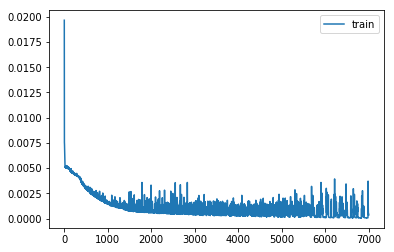

In [50]:
pyplot.plot(history.history['loss'], label='train')
pyplot.legend()
pyplot.show()

In [51]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from numpy import concatenate
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [52]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [53]:
import math
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 50.59 RMSE
Test Score: 187.48 RMSE


In [54]:
inv_y=testY[0]
inv_yhat=testPredict[:,0]

error = []
for i in range(len(inv_y)):
    error.append(inv_y[i] - inv_yhat[i])
 
squaredError = []
absError = []
for val in error:
    squaredError.append(val * val)#target-prediction之差平方 
    absError.append(abs(val))#误差绝对值

print("MSE = ", sum(squaredError) / len(squaredError))#均方误差MSE
 
from math import sqrt
print("RMSE = ", sqrt(sum(squaredError) / len(squaredError)))#均方根误差RMSE
print("MAE = ", sum(absError) / len(absError))#平均绝对误差MAE
def mape(inv_y, inv_yhat):
    n = len(inv_y)
    mape = sum(np.abs((inv_y - inv_yhat)/inv_y))/n*100
    return mape
print("MAPE = " ,mape(inv_y, inv_yhat))#平均绝对误差MAPE

MSE =  35148.90068261512
RMSE =  187.48040079596353
MAE =  108.28754830353543
MAPE =  5.620883560691763


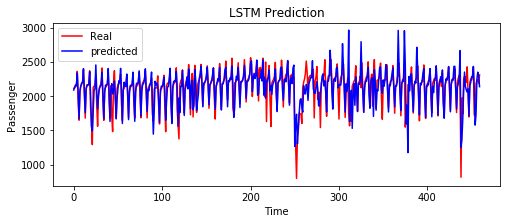

In [62]:
plt.figure(figsize=(8,3))
plt.plot(testY[0], color = 'red', label = 'Real ')   
plt.plot(testPredict[:,0], color = 'blue', label = 'predicted') 
plt.title('LSTM Prediction')
plt.xlabel('Time')
plt.ylabel('Passenger')
plt.legend()
plt.show()

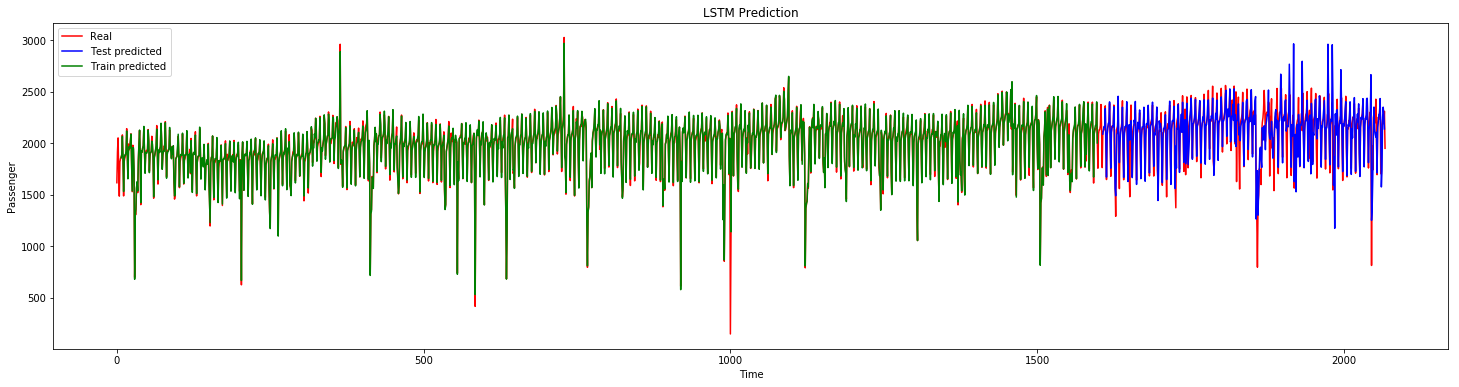

In [59]:
predicted=np.concatenate((trainPredict[:,0],testPredict[:,0]))
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
plt.figure(figsize=(25,6))
plt.plot(scaler.inverse_transform(dataset), color = 'red', label = 'Real ') 
plt.plot(testPredictPlot, color = 'blue', label = 'Test predicted')  
plt.plot(trainPredictPlot, color = 'green', label = 'Train predicted') 
plt.title('LSTM Prediction')
plt.xlabel('Time')
plt.ylabel('Passenger')
plt.legend()
plt.show()

In [57]:
from keras.models import load_model
 
model.save('LSTM2_model.h5')